### Support Vector Classifier Task

#### 심장마비 가능성 예측


#### feature
- age: 환자의 나이  
- sex: 환자의 성별 (0 = female, 1 = male).  
- cp: 흉통성 (1 = typical angina(전형 협심증), 2 = atypical angina(비전형 협심증), 3 = non-anginal pain(비협심증), 4 = asymptomatic(무증상))  
- trestbps: 정지 혈압(mmHg)  
- chol: 혈청 콜레스테롤 수치(mg/dl)  
- fbs: 공복혈당 (> 120mg/dl) (1 = true, 0 = false)  
- restecg: 정지 심전도 결과 (0 = normal, 1 = having ST-T wave abnormality(ST-T파 이상), 2 = probable or definite left ventricular hypertrophy(좌심실 비대 가능성 또는 확실성))  
- thalach: 최대 심박수  
- exang: 운동 유발 협심증 (1 = yes, 0 = no)  
- oldpeak: 휴식과 관련된 운동으로 인한 ST 우울증  
- slope: 피크 운동 ST 세그먼트의 기울기  
- ca: 형광 투시법으로 채색된 주요 혈관의 수  
- thal: 탈라세미아(혈액장애의 일종) results (3 = normal, 6 = fixed defect(고정결함), 7 = reversible defect(가역결함))  

#### target
- output : 1 = 심장마비 존재, 0 = 심장마비 없음

In [1]:
import pandas as pd
h_df = pd.read_csv('./datasets/heart.csv')
h_df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [2]:
h_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = h_df.corr()
corr

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [71]:
corr['output'].sort_values(ascending=False)[1:]

cp          0.433798
thalachh    0.421741
slp         0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trtbps     -0.144931
age        -0.225439
sex        -0.280937
thall      -0.344029
caa        -0.391724
oldpeak    -0.430696
exng       -0.436757
Name: output, dtype: float64

<Axes: >

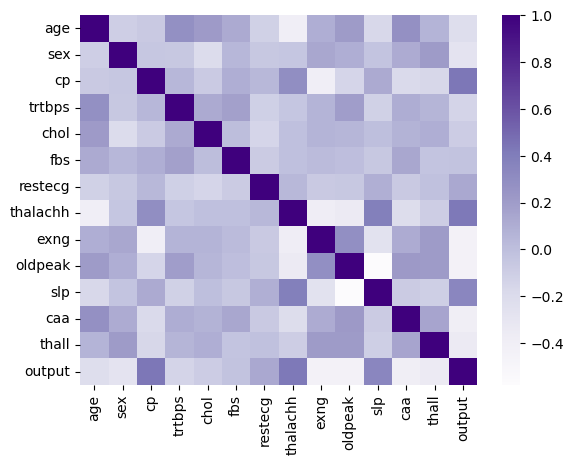

In [5]:
sns.heatmap(corr, cmap="Purples")

In [14]:
h_df.output.value_counts()

output
1    165
0    138
Name: count, dtype: int64

In [23]:
# 타겟 데이터의 비중이 맞지 않아 오버샘플링으로 '0' 인것들을 '1' 인것들의 개수와 맞춤

In [22]:
class_1_sample = h_df[h_df.output == 1].sample(165, replace=False, random_state=124)

class_0_sample = h_df[h_df.output == 0].sample(165, replace=True, random_state=124)

h_df = pd.concat([class_1_sample, class_0_sample]).reset_index(drop=True)

h_df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,65,0,2,160,360,0,0,151,0,0.8,2,0,2,1
1,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
2,42,1,2,120,240,1,1,194,0,0.8,0,0,3,1
3,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
4,58,0,2,120,340,0,1,172,0,0.0,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,51,1,0,140,298,0,1,122,1,4.2,1,3,3,0
326,63,0,0,150,407,0,0,154,0,4.0,1,3,3,0
327,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
328,57,1,2,128,229,0,0,150,0,0.4,1,1,3,0


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

<Axes: xlabel='restecg', ylabel='cp'>

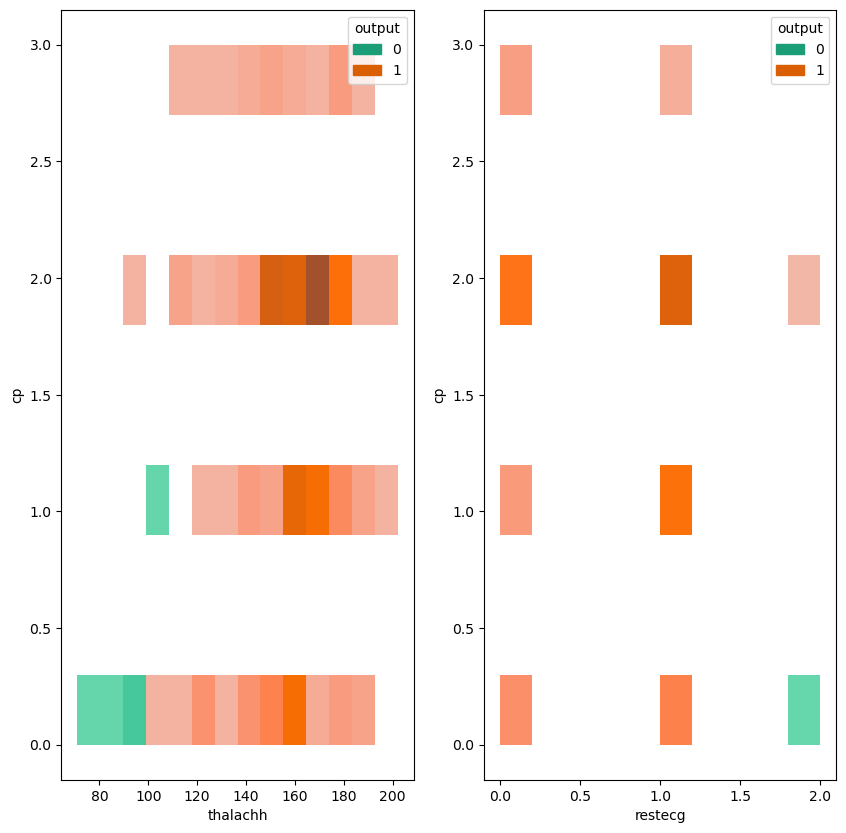

In [20]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))

sns.histplot(x='thalachh', y='cp', hue='output', palette="Dark2", data=h_df, ax=ax1)
sns.histplot(x='restecg', y='cp', hue='output', palette="Dark2", data=h_df, ax=ax2)

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trtbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalachh'}>],
       [<Axes: title={'center': 'exng'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slp'}>, <Axes: title={'center': 'caa'}>],
       [<Axes: title={'center': 'thall'}>,
        <Axes: title={'center': 'output'}>, <Axes: >, <Axes: >]],
      dtype=object)

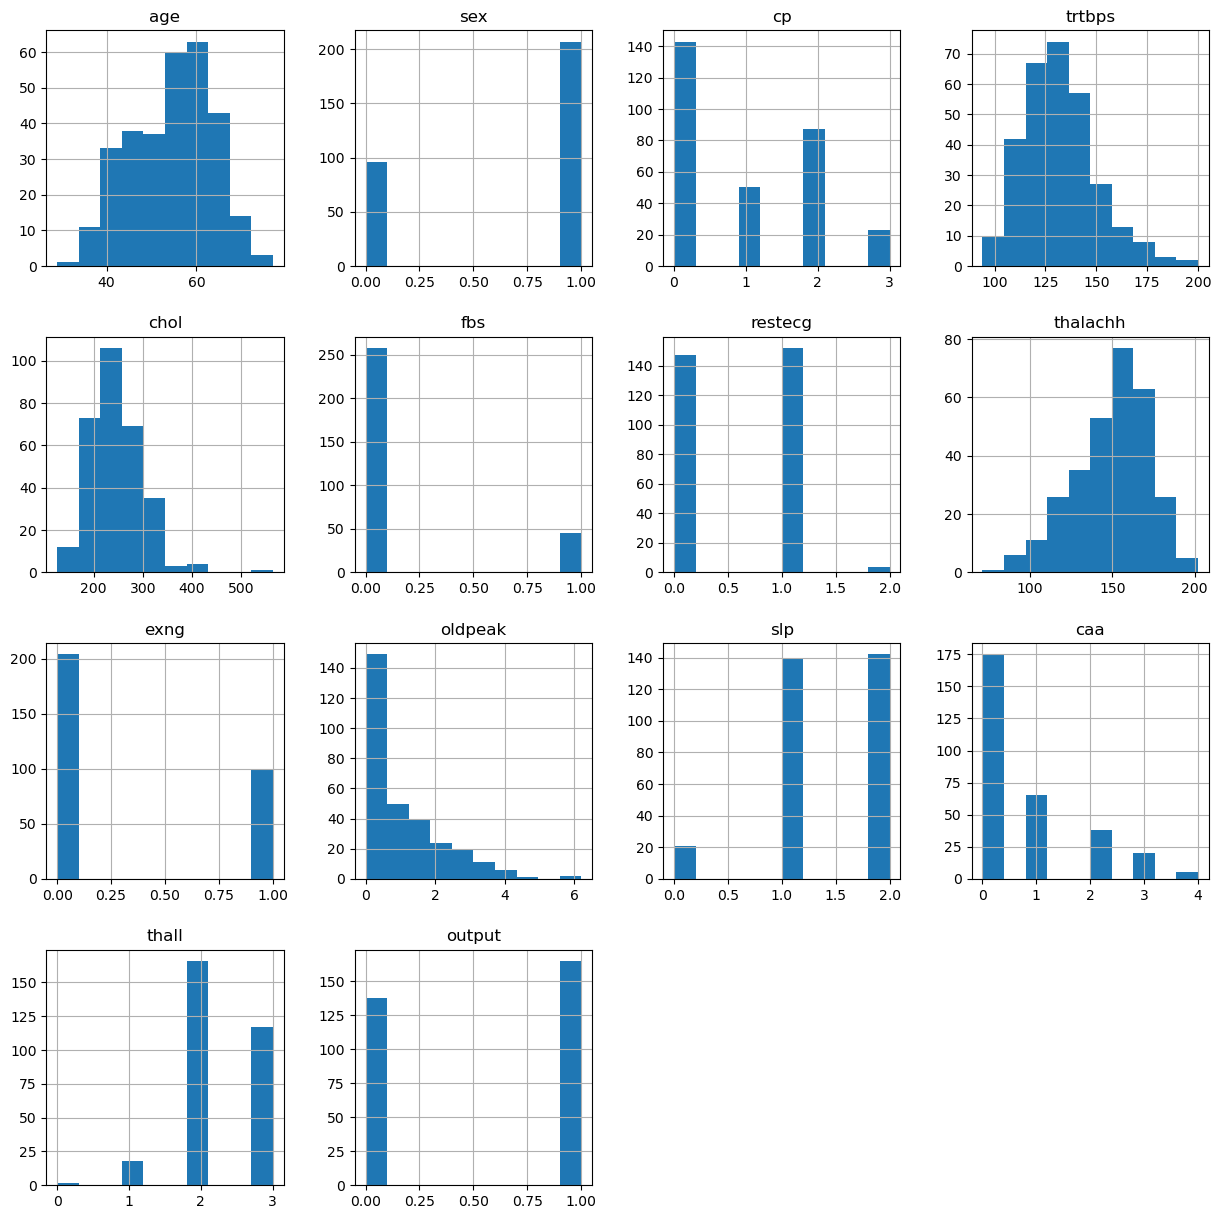

In [13]:
h_df.hist(figsize=(15, 15))

In [24]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

features, targets = h_df.iloc[:, :-1], h_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)

# 파이프 라인으로 구축한 각 파이프의 이름을 먼저 작성하고, 
# (_)언더바를 두 번(__) 작성한 뒤 파라미터 이름을 작성한다.
parameters = {
    'svc__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'svc__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
    'svc__kernel': ['linear', 'rbf']
}

svc = SVC(probability=True)

# 1. 파이프라인 구축
svc_pipe = Pipeline([('standard_scaler', StandardScaler()), ('svc', svc)])

# 2. GridSearchCV
g_svc = GridSearchCV(svc_pipe, param_grid=parameters, cv=3, refit=True, return_train_score=True)

# 3. 훈련
g_svc.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('standard_scaler', StandardScaler()),
                                       ('svc', SVC(probability=True))]),
             param_grid={'svc__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'svc__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                         'svc__kernel': ['linear', 'rbf']},
             return_train_score=True)

In [72]:
result_df = pd.DataFrame(g_svc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
# print(result_df['params'][1])
display(result_df)

,params,mean_test_score,rank_test_score
0,"{'svc__C': 0.001, 'svc__gamma': 0.001, 'svc__k...",0.848485,1
1,"{'svc__C': 0.001, 'svc__gamma': 0.001, 'svc__k...",0.840909,7
2,"{'svc__C': 0.001, 'svc__gamma': 0.01, 'svc__ke...",0.848485,1
3,"{'svc__C': 0.001, 'svc__gamma': 0.01, 'svc__ke...",0.833333,13
4,"{'svc__C': 0.001, 'svc__gamma': 0.1, 'svc__ker...",0.848485,1
...,...,...,...
67,"{'svc__C': 100, 'svc__gamma': 1, 'svc__kernel'...",0.712121,55
68,"{'svc__C': 100, 'svc__gamma': 10, 'svc__kernel...",0.821970,40
69,"{'svc__C': 100, 'svc__gamma': 10, 'svc__kernel...",0.704545,58
70,"{'svc__C': 100, 'svc__gamma': 100, 'svc__kerne...",0.821970,40


In [26]:
svc = g_svc.best_estimator_
prediction = svc.predict(X_test)

In [27]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

def get_evaluation(y_test, prediction, classifier=None, X_test=None):
    confusion = confusion_matrix(y_test, prediction)
    accuracy = accuracy_score(y_test , prediction)
    precision = precision_score(y_test , prediction, average='macro')
    recall = recall_score(y_test , prediction, average='macro')
    f1 = f1_score(y_test, prediction, average='macro')
    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}'.format(accuracy, precision, recall, f1))
    print("#" * 80)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

오차 행렬
[[28  5]
 [ 4 29]]
정확도: 0.8636, 정밀도: 0.8640, 재현율: 0.8636, F1: 0.8636
################################################################################


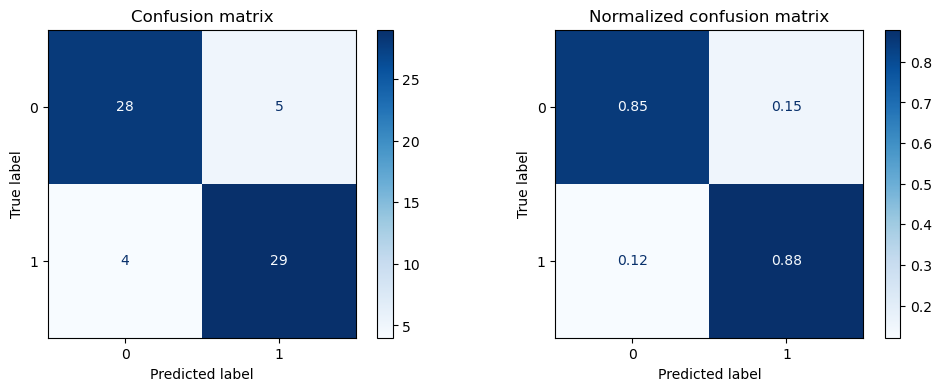

In [28]:
get_evaluation(y_test, prediction, svc, X_test)

In [37]:
svc = SVC(C=10, kernel='linear', probability=True)

svc_pipe = Pipeline([('standard_scaler', StandardScaler()), ('svc', svc)])
svc_pipe.fit(X_train.values, y_train)

Pipeline(steps=[('standard_scaler', StandardScaler()),
                ('svc', SVC(C=10, kernel='linear', probability=True))])

In [39]:
prediction = svc_pipe.predict(X_test.values)

오차 행렬
[[31  2]
 [ 5 28]]
정확도: 0.8939, 정밀도: 0.8972, 재현율: 0.8939, F1: 0.8937
################################################################################


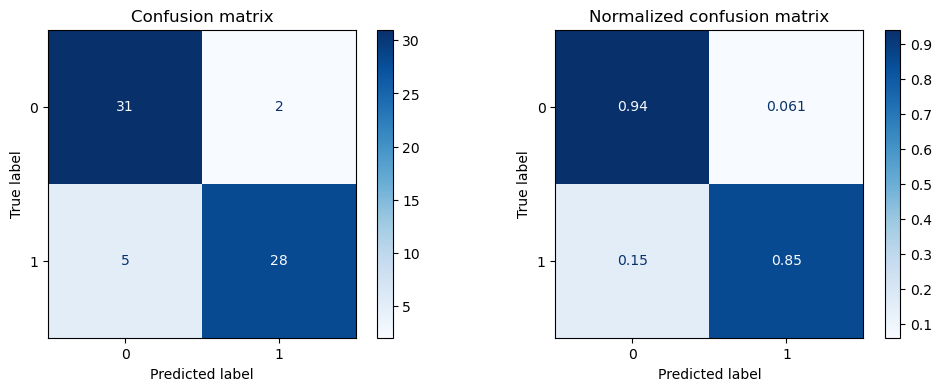

In [40]:
get_evaluation(y_test, prediction, svc_pipe, X_test.values)

In [44]:
svc = SVC(C=1, kernel='linear', probability=True)

svc_pipe = Pipeline([('standard_scaler', StandardScaler()), ('svc', svc)])
svc_pipe.fit(X_train.values, y_train)

Pipeline(steps=[('standard_scaler', StandardScaler()),
                ('svc', SVC(C=1, kernel='linear', probability=True))])

In [45]:
prediction = svc_pipe.predict(X_test.values)

오차 행렬
[[31  2]
 [ 6 27]]
정확도: 0.8788, 정밀도: 0.8844, 재현율: 0.8788, F1: 0.8783
################################################################################


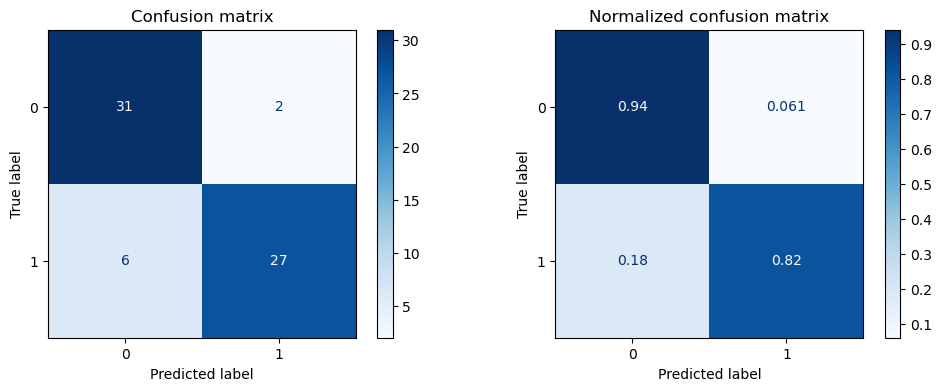

In [46]:
get_evaluation(y_test, prediction, svc_pipe, X_test.values)

In [47]:
svc = SVC(C=0.1, kernel='linear', probability=True)

svc_pipe = Pipeline([('standard_scaler', StandardScaler()), ('svc', svc)])
svc_pipe.fit(X_train.values, y_train)

Pipeline(steps=[('standard_scaler', StandardScaler()),
                ('svc', SVC(C=0.1, kernel='linear', probability=True))])

In [48]:
prediction = svc_pipe.predict(X_test.values)

오차 행렬
[[29  4]
 [ 7 26]]
정확도: 0.8333, 정밀도: 0.8361, 재현율: 0.8333, F1: 0.8330
################################################################################


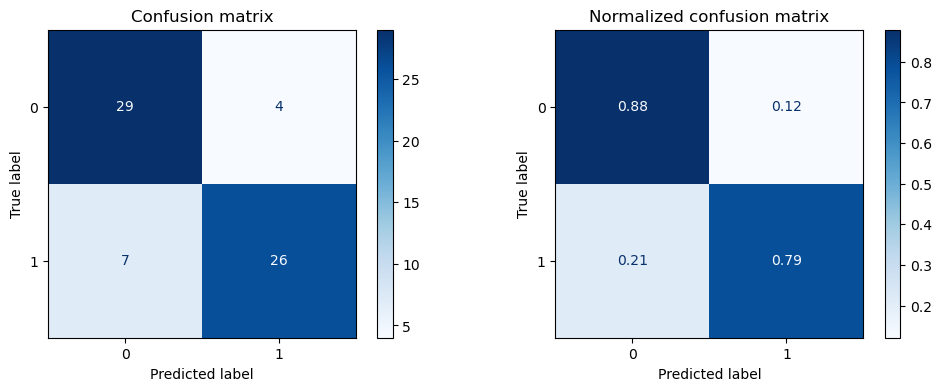

In [49]:
get_evaluation(y_test, prediction, svc_pipe, X_test.values)

In [56]:
svc = SVC(C=100, kernel='linear', probability=True)

svc_pipe = Pipeline([('standard_scaler', StandardScaler()), ('svc', svc)])
svc_pipe.fit(X_train.values, y_train)

Pipeline(steps=[('standard_scaler', StandardScaler()),
                ('svc', SVC(C=100, kernel='linear', probability=True))])

In [57]:
prediction = svc_pipe.predict(X_test.values)

오차 행렬
[[31  2]
 [ 5 28]]
정확도: 0.8939, 정밀도: 0.8972, 재현율: 0.8939, F1: 0.8937
################################################################################


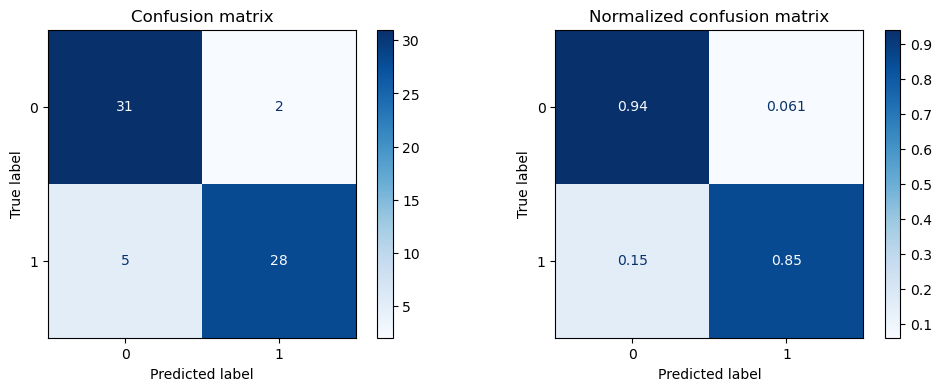

In [58]:
get_evaluation(y_test, prediction, svc_pipe, X_test.values)

In [69]:
svc_pipe.predict_proba(X_test.values).tolist()

[[0.9571896386755375, 0.04281036132446236],
 [0.938822785538501, 0.06117721446149904],
 [0.141133231874836, 0.8588667681251642],
 [0.051316358064021086, 0.9486836419359792],
 [0.06943507994294554, 0.9305649200570545],
 [0.4255381164600762, 0.5744618835399239],
 [0.7127490495033795, 0.28725095049662047],
 [0.9571896386755375, 0.04281036132446236],
 [0.9630835343328712, 0.0369164656671288],
 [0.28289438776623255, 0.7171056122337673],
 [0.06376366267847995, 0.93623633732152],
 [0.06090357162964856, 0.9390964283703515],
 [0.4594654080140332, 0.5405345919859669],
 [0.6264966061400437, 0.37350339385995623],
 [0.976780641375737, 0.02321935862426299],
 [0.941742157014195, 0.05825784298580504],
 [0.8432938555125404, 0.15670614448745954],
 [0.04435878496397684, 0.9556412150360234],
 [0.05643329628894257, 0.9435667037110574],
 [0.9779241245189478, 0.022075875481052217],
 [0.1014530660662901, 0.89854693393371],
 [0.14313903605836245, 0.8568609639416377],
 [0.8710897300040105, 0.12891026999598962],

1. C=0.001
- 정확도: 0.8636, 정밀도: 0.8640, 재현율: 0.8636, F1: 0.8636

2. C=0.01
- 정확도: 0.8333, 정밀도: 0.8361, 재현율: 0.8333, F1: 0.8330

3. C=1
- 정확도: 0.8788, 정밀도: 0.8844, 재현율: 0.8788, F1: 0.8783

4. C=10
- 정확도: 0.8939, 정밀도: 0.8972, 재현율: 0.8939, F1: 0.8937

5. C=100
- 정확도: 0.8939, 정밀도: 0.8972, 재현율: 0.8939, F1: 0.8937

#### 결론
feature별 데이터 분포를 조정했다면, 다시 표준화 진행 시 패턴의 방향성을 잃게 되어 성능이 더 떨어질 수 있다.  
스케일링이 항상 옳은 것이 아니다.